# Linear Regression as Maximum Likelihood

In this lab, we explore the concept of linear regression in terms of maximum likelihood estimation.

We first load some standard libraries and define a function to give us some random data points, for the purposes of example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

def random_data(beta, n, std_dev, maxval=100):

    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.rand(n) * maxval
    
    # Generate the random error of n samples, with a random value from a normal distribution, with a standard
    # deviation provided in the function argument
    e = np.random.randn(n) * std_dev
    
    # Calculate `y` according to the equation discussed
    y = x * beta + e
    return x, y 

Let's take a look at the random data.

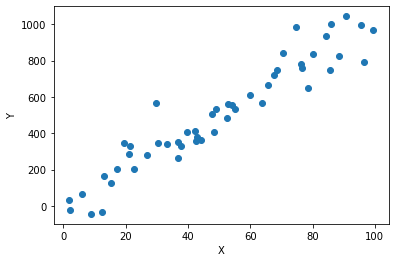

In [2]:
x,y = random_data(10, 50, 100)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x,y)
plt.show()

We use the scikit-learn function to split our data into a test and training set, with the test set being 33% of the total dataset.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=42)

print("Size of train sample: ", len(X_train))
print("Size of test sample: ", len(X_test))

Size of train sample:  33
Size of test sample:  17


Given the dataset, we now maximize the log likelihood for observing $x$ and $y$, subject to the parameters $m$ and $b$.  The likelihood function is expressed as:

$$\prod_{i=0}^N \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2\sigma^2}(y_i - \theta^T x_i)^2\right)$$

Taking a log on the above yields:

$$- \frac{N}{2}\log(2\sigma^2\pi) - \frac{1}{2\sigma^2} \sum_{i=0}^N  (y_i - \theta^T x_i)^2$$

Removing terms that don't depend on the parameters and reversing signs produces the following simplified term that we aim to minimize with respect to the parameter $\theta$ (in this case $m$ and $b$):

$$\frac{1}{2\sigma^2} \sum_{i=0}^N  (y_i - \theta^T x_i)^2$$

(The minimization algorithm is described [here](https://en.wikipedia.org/wiki/Limited-memory_BFGS), in case you want to read more about it.)

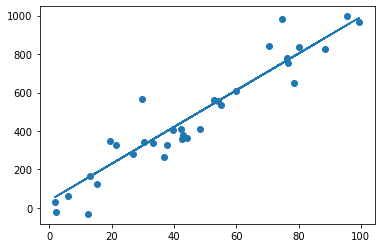

In [4]:
from scipy.optimize import minimize

# A simplified computation of the negative log likelihood, based on the derivation above.

def negative_ll(theta):
    (m, b, sigma) = theta

    y  = m*X_train + b  
    
    # Exponent from log likelihood that we are trying to maximize
    # We negate the term so that we can minimize it.
    L = (1 / (2 * sigma ** 2) * sum((y - y_train) ** 2))
    return L


# minimuze 
MLE = minimize(negative_ll, np.array([1,1,1]), method='L-BFGS-B')

(m, b, sigma) = MLE['x']

plt.scatter(X_train,y_train)
plt.plot(x, m*x + b)
plt.show()